In [1]:
import tensorflow as tf  
import matplotlib.pyplot as plt  

# Set random seed
tf.random.set_seed(42)

In [2]:
# 1. Data Loading and Preprocessing
print("Loading and preprocessing data...")

# Load training data (FNA folder)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'Dataset2/FNA',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

# Load validation data
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'Dataset2/FNA',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

# Data preprocessing
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply preprocessing
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(data_augmentation(x)), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))


Loading and preprocessing data...
Found 1724 files belonging to 2 classes.
Using 1380 files for training.
Found 1724 files belonging to 2 classes.
Using 344 files for validation.


In [3]:
# 2. Create and train CNN model
print("Creating and training model...")

model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(224, 224, 3)),
    
    # First convolutional block
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    
    # Second convolutional block
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    
    # Third convolutional block
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    
    # Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
print("Training model...")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    verbose=1
)

Creating and training model...
Training model...
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.8252 - loss: 6.5440 - val_accuracy: 0.5785 - val_loss: 1.2863
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8209 - loss: 0.5497 - val_accuracy: 0.4826 - val_loss: 1.3109
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7498 - loss: 0.4314 - val_accuracy: 0.5785 - val_loss: 1.6217
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7440 - loss: 0.4183 - val_accuracy: 0.8576 - val_loss: 0.4686
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.7742 - loss: 0.4922 - val_accuracy: 0.4215 - val_loss: 2.1166
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.7578 - loss: 0.4179 - val_accuracy: 0.4215 - val_loss: 2.3911
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.7714 - loss: 0.4044 - val_accuracy: 0.4215 - val_loss: 4.4572
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 171s 4s/step - accuracy: 0


Plotting training history...


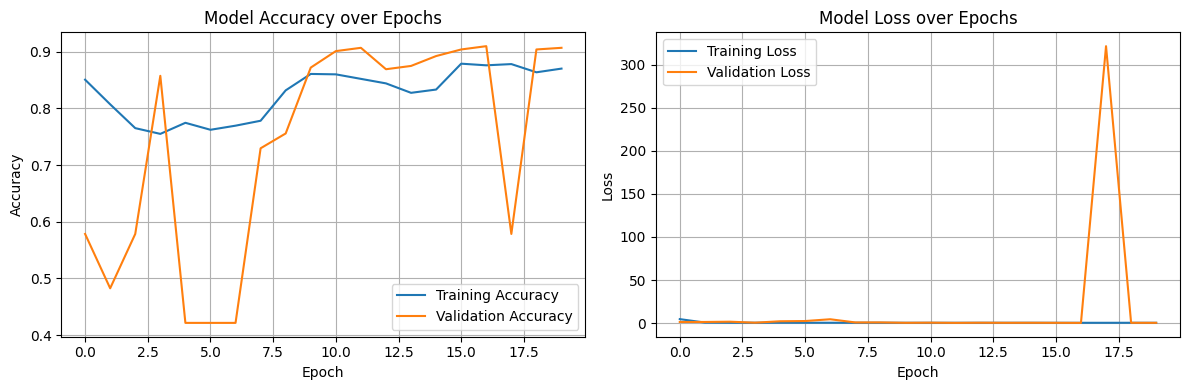


Training Metrics:
Final Training Accuracy: 0.8703
Final Validation Accuracy: 0.9070
Final Training Loss: 0.3531
Final Validation Loss: 0.2968


In [4]:
# 3. Plot training history
print("\nPlotting training history...")

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics
print("\nTraining Metrics:")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")



Predicting test images...
Found 14 files.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


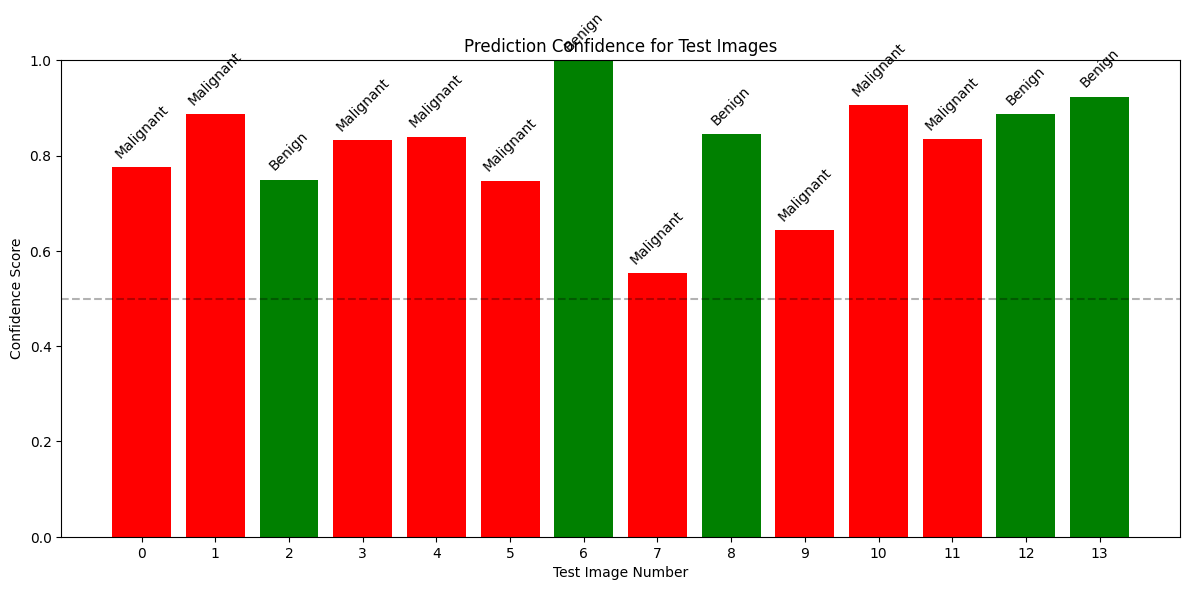


Test Image Predictions:
Image 1: Malignant (Confidence: 0.7762)
Image 2: Malignant (Confidence: 0.8865)
Image 3: Benign (Confidence: 0.7496)
Image 4: Malignant (Confidence: 0.8317)
Image 5: Malignant (Confidence: 0.8399)
Image 6: Malignant (Confidence: 0.7475)
Image 7: Benign (Confidence: 0.9999)
Image 8: Malignant (Confidence: 0.5526)
Image 9: Benign (Confidence: 0.8450)
Image 10: Malignant (Confidence: 0.6439)
Image 11: Malignant (Confidence: 0.9065)
Image 12: Malignant (Confidence: 0.8346)
Image 13: Benign (Confidence: 0.8875)
Image 14: Benign (Confidence: 0.9240)

Model saved as 'breast_cancer_model.h5'


In [5]:
# 4. Load and predict unlabeled test images
print("\nPredicting test images...")

test_dataset = tf.keras.utils.image_dataset_from_directory(
    'Dataset2/test',
    image_size=(224, 224),
    shuffle=False,
    labels=None,
    label_mode=None
)

# Normalize test images
test_dataset = test_dataset.map(lambda x: normalization_layer(x))

# Make predictions
predictions = model.predict(test_dataset)

# Create a bar plot of prediction confidences
plt.figure(figsize=(12, 6))
confidence_scores = [pred[0] if pred[0] > 0.5 else 1 - pred[0] for pred in predictions]
classes = ['Malignant' if pred > 0.5 else 'Benign' for pred in predictions]
colors = ['red' if pred > 0.5 else 'green' for pred in predictions]

plt.bar(range(len(predictions)), confidence_scores, color=colors)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)
plt.title('Prediction Confidence for Test Images')
plt.xlabel('Test Image Number')
plt.ylabel('Confidence Score')
plt.xticks(range(len(predictions)))
plt.ylim(0, 1)

for i, (conf, cls) in enumerate(zip(confidence_scores, classes)):
    plt.text(i, conf + 0.02, cls, ha='center', rotation=45)

plt.tight_layout()
plt.show()

# Print predictions
print("\nTest Image Predictions:")
for i, prediction in enumerate(predictions):
    result = "Malignant" if prediction > 0.5 else "Benign"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    print(f"Image {i+1}: {result} (Confidence: {confidence[0]:.4f})")

# Save model
model.save('breast_cancer_model.h5')
print("\nModel saved as 'breast_cancer_model.h5'")